**Purpose**: Demonstrates the fundamental effects of scaling on sentence embeddings using BERT
- Uses simple sentences about everyday activities
- Applies both scalar and dimension-wise scaling
- Shows how cosine similarity rankings change with different scaling approaches
- Uses pre-trained all-MiniLM-L6-v2 model
- Includes visualization of similarity matrices before and after scaling

In [1]:
import numpy as np
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns

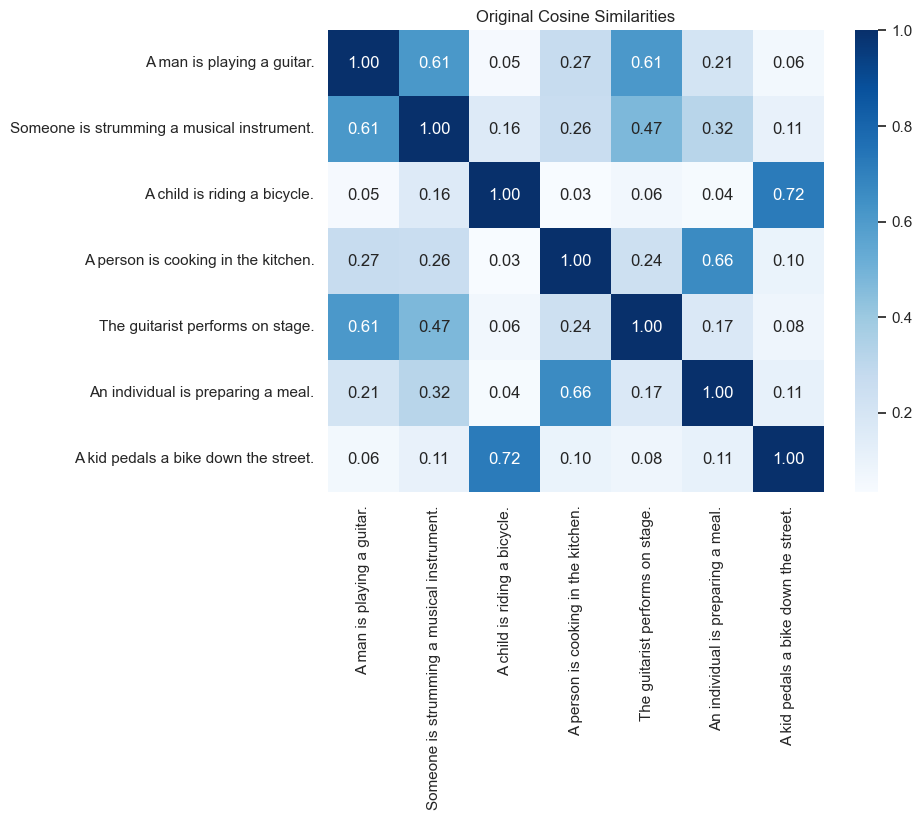

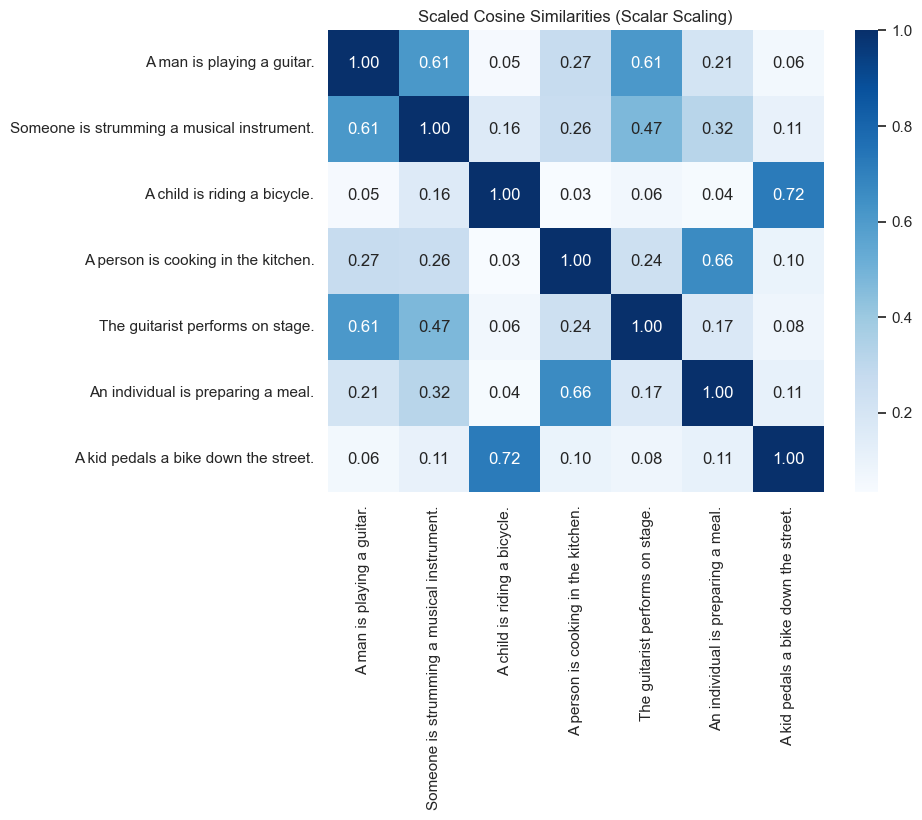

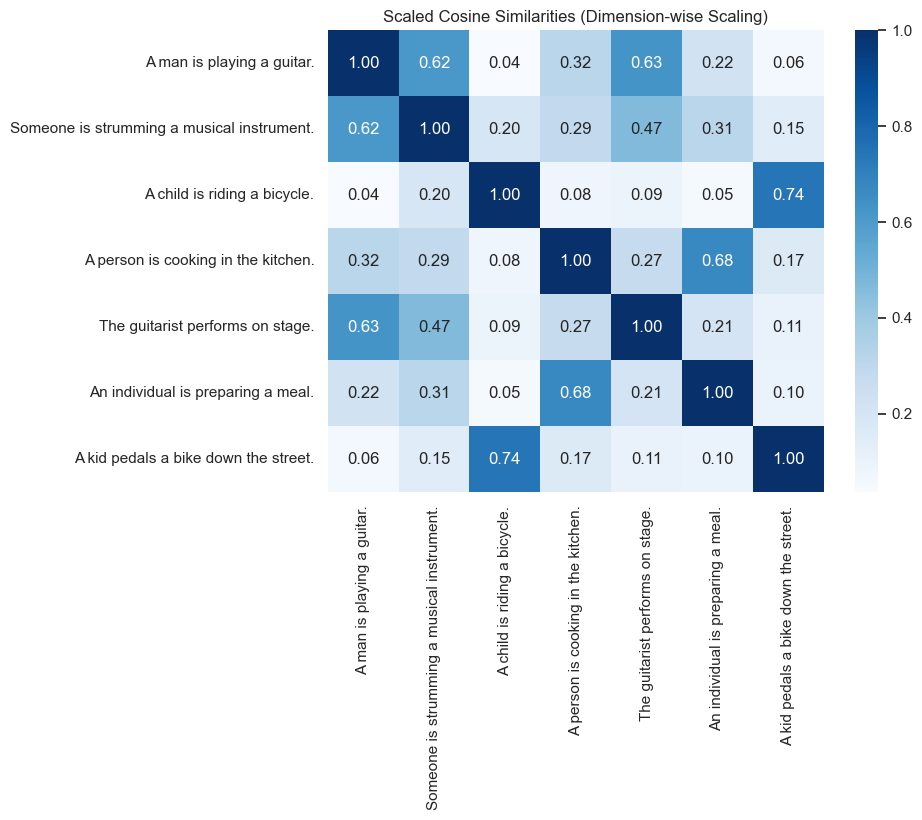

Ranking before scaling:
Sentence: Someone is strumming a musical instrument., Score: 0.8009
Sentence: A man is playing a guitar., Score: 0.6767
Sentence: The guitarist performs on stage., Score: 0.5241
Sentence: A person is cooking in the kitchen., Score: 0.3706
Sentence: An individual is preparing a meal., Score: 0.3546
Sentence: A child is riding a bicycle., Score: 0.2114
Sentence: A kid pedals a bike down the street., Score: 0.1471

Ranking after scaling:
Sentence: Someone is strumming a musical instrument., Score: 0.8035
Sentence: A man is playing a guitar., Score: 0.6763
Sentence: The guitarist performs on stage., Score: 0.5400
Sentence: A person is cooking in the kitchen., Score: 0.4006
Sentence: An individual is preparing a meal., Score: 0.3311
Sentence: A child is riding a bicycle., Score: 0.2121
Sentence: A kid pedals a bike down the street., Score: 0.1597


In [5]:
# Load the pretrained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = [
    "A man is playing a guitar.",
    "Someone is strumming a musical instrument.",
    "A child is riding a bicycle.",
    "A person is cooking in the kitchen.",
    "The guitarist performs on stage.",
    "An individual is preparing a meal.",
    "A kid pedals a bike down the street."
]

# Compute original embeddings
original_embeddings = model.encode(sentences, normalize_embeddings=True)

# Compute original cosine similarities
original_cosine_similarities = util.cos_sim(original_embeddings, original_embeddings)

# Define function to display similarity matrix
def display_similarity_matrix(similarity_matrix, title):
    sns.set(style='whitegrid')
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='Blues',
                xticklabels=sentences, yticklabels=sentences)
    plt.title(title)
    plt.show()

# Display original cosine similarities
display_similarity_matrix(original_cosine_similarities, "Original Cosine Similarities")

# Introduce arbitrary scaling to embeddings
scaling_factor = 5.0  # Scalar scaling
scaled_embeddings_scalar = original_embeddings * scaling_factor

dimension_scaling = np.linspace(0.5, 2.0, original_embeddings.shape[1])  # Dimension-wise scaling
scaled_embeddings_dim = original_embeddings * dimension_scaling

# Compute scaled cosine similarities
scaled_cosine_similarities_scalar = util.cos_sim(scaled_embeddings_scalar, scaled_embeddings_scalar)
scaled_cosine_similarities_dim = util.cos_sim(scaled_embeddings_dim, scaled_embeddings_dim)

# Display scaled cosine similarities
display_similarity_matrix(scaled_cosine_similarities_scalar, "Scaled Cosine Similarities (Scalar Scaling)")
display_similarity_matrix(scaled_cosine_similarities_dim, "Scaled Cosine Similarities (Dimension-wise Scaling)")

# Semantic search example
query = "A person is playing an instrument."
query_embedding = model.encode(query, normalize_embeddings=True)

# Apply dimension-wise scaling to query embedding
query_embedding_scaled = query_embedding * dimension_scaling

# Compute similarities before scaling
cosine_scores = util.cos_sim(query_embedding, original_embeddings)[0]
top_results = np.argsort(-cosine_scores)
print("Ranking before scaling:")
for idx in top_results:
    print(f"Sentence: {sentences[idx]}, Score: {cosine_scores[idx]:.4f}")

# Compute similarities after scaling
cosine_scores_scaled = util.cos_sim(query_embedding_scaled, scaled_embeddings_dim)[0]
top_results_scaled = np.argsort(-cosine_scores_scaled)
print("\nRanking after scaling:")
for idx in top_results_scaled:
    print(f"Sentence: {sentences[idx]}, Score: {cosine_scores_scaled[idx]:.4f}")